In [69]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Get Data
with open('info.txt', 'r') as file:
    lines = file.readlines()

In [71]:
def get_agents():
    agent_set = set([])
    # Parse Data
    for line in lines:
        words = line.split('|')
        words = [word.strip() for word in words]

        docker_name = words[1]
        if docker_name not in agent_set:
            agent_set.add(docker_name)

    return agent_set

In [96]:
def get_data(agent, task=None):
    x = []
    y = []
    # Parse Data
    for line in lines:
        indiv_status = [''] * 5
        indiv_progress = [''] * 5
        indiv_score = [''] * 5

        words = line.split('|')
        words = [word.strip() for word in words]

        date, docker_name, status, score = words[0:4]

        for i in range(5):
            _, indiv_status[i], indiv_progress[i], indiv_score[i] = words[4*i+4:4*i+8]

        if agent == docker_name:
            if not task:
                sum_progress = 0
                sum_count = 0
                for progress in indiv_progress:
                    if progress not in ['N/A', '']:
                        sum_progress += float(progress[:-1])
                        sum_count += 1
                x.append(sum_progress / sum_count if sum_count > 0 else 0)
                y.append(float(score))
            else:
                x.append(indiv_progress[task])
                y.append(float(indiv_score[task]))

    return x, y

In [97]:
get_agents()

{'rainbow-agent:v10',
 'rainbow-agent:v7',
 'rainbow-agent:v8',
 'rainbow-agent:v9'}

In [98]:
xs, ys = get_data('rainbow-agent:v9')

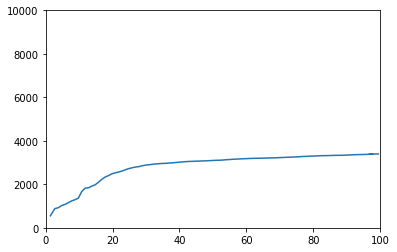

In [100]:
plt.ylim([0, 10000])
plt.xlim([0, 100])
plt.plot(xs, ys)